# Observations
1-Capomulin and Ramicane seem to be the most studied drugs, as they have the most data points collected compared with the other drugs in this trial.
2-The study seems to be pretty evenly distributed between and male and female participants, so gender shouldn't be listed as a bias.
3- Having an equal number of male and female rats is important to making sure that a good number of rats represents each gender.
4- Of the four drugs looked at, Capomulin, Ramicane, Ceftamin, and Ifubinol, by looking at the box and whisker plot; the regimens for Capomulin and Ramicane had the most success at reducing the tumor size when comparing the final measured volume.
5-By looking at the box and whisker plot, we can see that the inner quartile for Capomulin is more narrow, therefore we can assume that it had the most consistant reults compared to the other three drugs. 
6- Capomulin did have two outliers as seen in red, but it would be better to have outliers on the low end than on the other end of the scale, as these can be seen as successes rather than failures.
7-Looking at the line graph for Capomulin, we can see the average progression of the tumor size over 45 days, and see that it makes a substantial difference in shrinking tumor sizes. This looks very promising for a treatment in other species.
8-Looking at the scatter plot, we can see that the tumor volume to mouse weight is a positively correlated relationship. Which makes sense, as a mouse that has a large tumor inside of it or on it is likely to weigh more than a healthy mouse.
9-When we over lay the linear regression for the the scatter plot data, we see that it has a slope of .95x, so this means that it is a positive relation as well.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_results

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [63]:
drug_grouped = combined_results.groupby(["Drug Regimen"])
drug_group_mean = round(drug_grouped["Tumor Volume (mm3)"].mean(),2)
drug_group_median = round(drug_grouped["Tumor Volume (mm3)"].median(),2)
drug_group_var = round(drug_grouped["Tumor Volume (mm3)"].var(),2)
drug_group_std = round(drug_grouped["Tumor Volume (mm3)"].std(),2)
drug_group_sem = round(drug_grouped["Tumor Volume (mm3)"].sem(),2)
summary_stats_df = pd.DataFrame({"Mean Volume":drug_group_mean,
                                 "Median Volume":drug_group_median,
                                 "Variance":drug_group_var,
                                 "Standard Deviation":drug_group_std,
                                 "Standard Error of Measurment":drug_group_sem})
summary_stats_df

Mean Volume  Median Volume  Variance  Standard Deviation  \
Drug Regimen                                                             
Capomulin           40.68          41.56     24.95                4.99   
Ceftamin            52.59          51.78     39.29                6.27   
Infubinol           52.88          51.82     43.13                6.57   
Ketapril            55.24          53.70     68.55                8.28   
Naftisol            54.33          52.51     66.17                8.13   
Placebo             54.03          52.29     61.17                7.82   
Propriva            52.32          50.85     42.35                6.51   
Ramicane            40.22          40.67     23.49                4.85   
Stelasyn            54.23          52.43     59.45                7.71   
Zoniferol           53.24          51.82     48.53                6.97   

              Standard Error of Measurment  
Drug Regimen                                
Capomulin                             0.33  
Ceftamin                              0.47  
Infubinol                             0.49  
Ketapril                              0.60  
Naftisol                              0.60  
Placebo                               0.58  
Propriva                              0.51  
Ramicane                              0.32  
Stelasyn                              0.57  
Zoniferol                             0.52

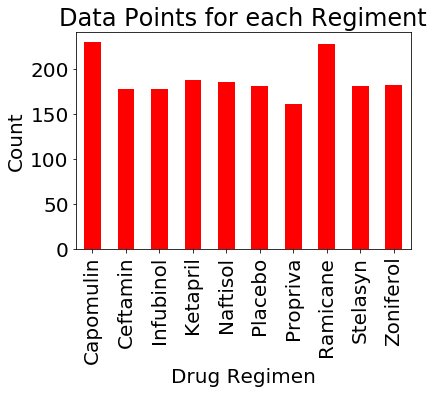

<Figure size 432x288 with 0 Axes>

In [96]:
drug_group = combined_results.groupby("Drug Regimen")

drug_group_count = pd.DataFrame(drug_group["Drug Regimen"].count())

count_bar = drug_group_count.plot(kind = "bar", title = "Data Points for each Regiment", color = "red", legend= False)

count_bar.set_ylabel("Count")
plt.show()


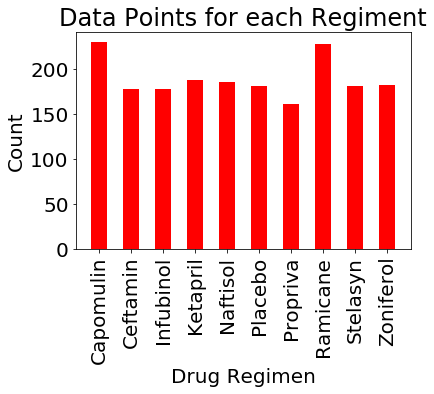

<Figure size 432x288 with 0 Axes>

In [97]:
#Generate Bar Chart with Matplot
x_axis = np.arange(len(drug_group_count))
x_ticks = [value for value in x_axis]

plt.bar(x_axis, drug_group_count["Drug Regimen"], color = "red", width = .5, align = "center")
plt.xticks(x_ticks, list(drug_group_count.index), rotation="vertical")
plt.title("Data Points for each Regiment")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.show()
plt.savefig("Figures/Data_Points.png")

In [67]:
#Group by "Sex" column from original data
gender_group = combined_results.groupby('Sex')

# Count up each gender
gender_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_count.head()

Sex
Sex        
Female  935
Male    958

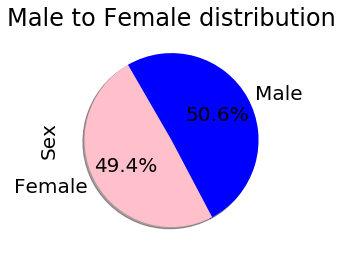

In [90]:
gender_count.plot(kind="pie", y="Sex", colors = ["pink","blue"], title="Male to Female distribution", autopct='%1.1f%%',
                  shadow=True, legend = False, fontsize=20, startangle=120)

plt.savefig("Figures/Gender_Distribution_Pandas.png")

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


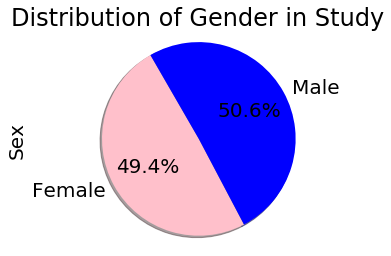

<Figure size 432x288 with 0 Axes>

In [91]:
gender_array = list(gender_count.index.values)

plt.pie(gender_count, labels=gender_array, colors = ["pink", "blue"], autopct="%1.1f%%", shadow= True, startangle=120)
plt.title("Distribution of Gender in Study")
plt.ylabel("Sex")
plt.axis("equal")
plt.rcParams["font.size"]=20
plt.show()
plt.savefig("Figures/Gender_Distribution_matplot.png")

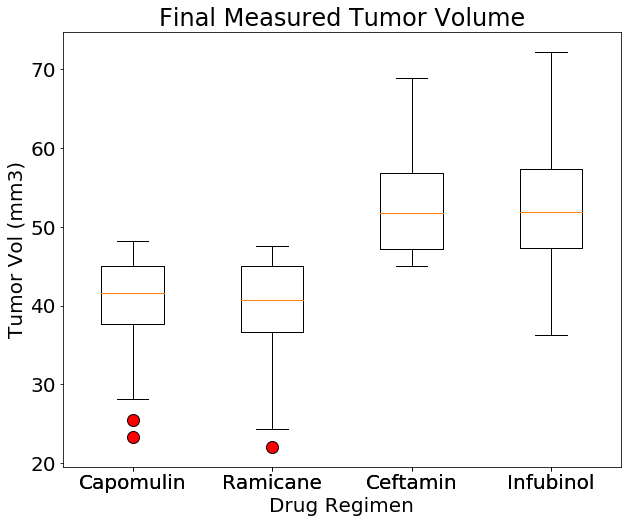

<Figure size 432x288 with 0 Axes>

In [92]:
four_drugs=["Capomulin","Ramicane","Ceftamin","Infubinol"]
#four_drugs_df = combined_results.loc[combined_results["Drug Regimen"]== "Capomulin"]
drug_calculations = []
for drug in four_drugs:
    four_drugs_df = combined_results.loc[combined_results["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
#     quartiles = four_drugs_df.quantile([.25,.5,.75])
#     lowerq = quartiles[.25]
#     upperq = quartiles[.75]
#     iqr = upperq-lowerq
#     lower_bounds = lowerq - (1.5 * iqr)
#     upper_bounds = upperq + (1.5 * iqr)
    drug_calculations.append(four_drugs_df)
fig1, ax = plt.subplots(figsize=(10,8))
ax.set_title('Final Measured Tumor Volume')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')

plt.xticks([1,2,3,4],four_drugs)
plt.boxplot(drug_calculations, labels = four_drugs, flierprops = dict(markerfacecolor="red", markersize=12),)

plt.show()
plt.savefig("Figures/Box_and_Whisker.png")



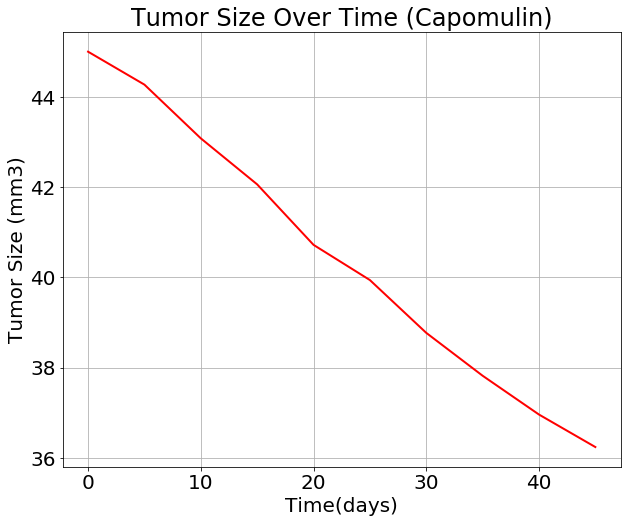

In [93]:
#Extract only the Capomulin data in order to plot its effectiveness
capomulin_data = combined_results.loc[combined_results['Drug Regimen'] == 'Capomulin']


capomulin_tumor = capomulin_data.groupby(["Timepoint"])
tumor_mean = round(capomulin_tumor["Tumor Volume (mm3)"].mean(),2)
tumor_mean
x_values = list(tumor_mean.index.values)
y_values = tumor_mean
tumor_mean.plot(figsize =(10,8), color = "red", linewidth = 2, grid= True)
plt.title("Tumor Size Over Time (Capomulin)") 
plt.xlabel("Time(days)")
plt.ylabel("Tumor Size (mm3)")
plt.savefig("Figures/Tumor_Over_Time_Line.png")

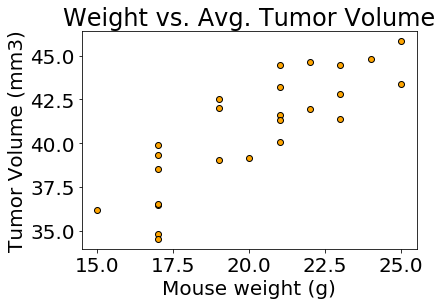

In [94]:

cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        mouse_weight =('Weight (g)', np.mean),\
        tumor_mean =('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(30)

plt.scatter(cap_mouse_id['mouse_weight'], cap_mouse_id['tumor_mean'], marker="o", facecolors="orange",
           edgecolors="black")
plt.title("Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Figures/Scatter_Plot.png")

In [73]:
correlation = st.pearsonr(cap_mouse_id['mouse_weight'],cap_mouse_id['tumor_mean'])
print(f'The correlation coefficient between mouse weight and average tumor size is {round(correlation[0],3)}.')

The correlation coefficient between mouse weight and average tumor size is 0.842.


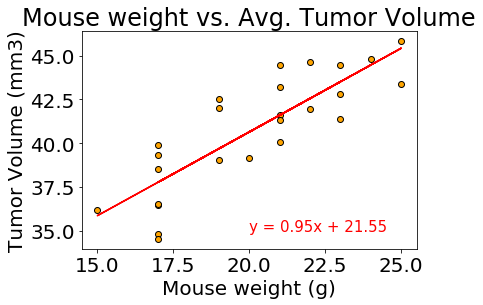

In [99]:
x_values = cap_mouse_id['mouse_weight']
y_values = cap_mouse_id['tumor_mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values,facecolors="orange",
           edgecolors="black")
plt.plot(x_values,regress,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Figures/Scatter_with_linregression.png")